In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import ceil, floor

def z_test_p_value(x1, n1, x2, n2):
    p_pooled = (x1 + x2) / (n1 + n2)
    p1 = x1 / n1
    p2 = x2 / n2
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    if se == 0:
        return 1.0
    z = (p1 - p2) / se
    return 2 * (1 - norm.cdf(abs(z)))

def plot_significance_boundaries(n1, n2, alpha=0.01, x1_max=None, num_tests=None):
    if x1_max is None:
        x1_max = n1

    x1_vals = np.arange(0, min(n1, x1_max) + 1)
    lower_sig_x2 = []
    upper_sig_x2 = []

    # Apply Bonferroni correction if number of tests is supplied
    adjusted_alpha = alpha
    if num_tests is not None:
        adjusted_alpha = alpha / num_tests

    for x1 in x1_vals:
        # Max x2 < x1 with p <= adjusted_alpha
        max_lower = np.nan
        for x2 in reversed(range(0, x1)):
            p = z_test_p_value(x1, n1, x2, n2)
            if p <= adjusted_alpha:
                max_lower = floor(x2)
                break
        lower_sig_x2.append(max_lower)

        # Min x2 > x1 with p <= adjusted_alpha
        min_upper = np.nan
        for x2 in range(x1 + 1, n2 + 1):
            p = z_test_p_value(x1, n1, x2, n2)
            if p <= adjusted_alpha:
                min_upper = ceil(x2)
                break
        upper_sig_x2.append(min_upper)

    plt.figure(figsize=(10, 6))
    plt.plot(x1_vals, lower_sig_x2, label="Max x2 < x1 with Bonferroni p ≤ α", linestyle='--', marker='v')
    plt.plot(x1_vals, upper_sig_x2, label="Min x2 > x1 with Bonferroni p ≤ α", linestyle='--', marker='^')
    plt.xlabel("x1 (successes in Group 1)")
    plt.ylabel("x2 (successes in Group 2)")
    title = f"Significance boundaries for two-proportion z-test\n(n1={n1}, n2={n2}, α={alpha}"
    if num_tests is not None:
        title += f", Bonferroni corrected for {num_tests} tests)"
    else:
        title += ")"
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

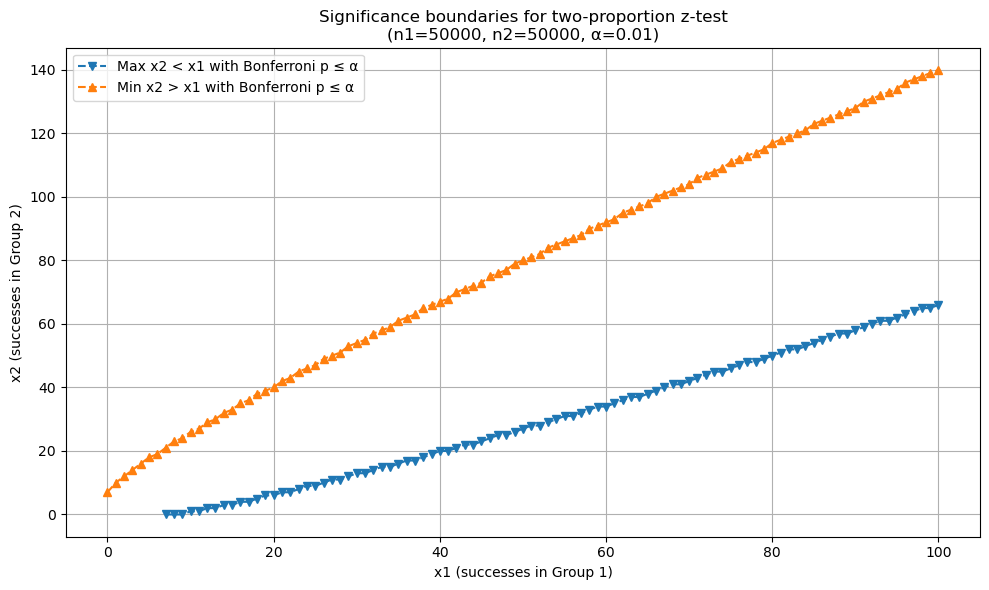

In [28]:
plot_significance_boundaries(n1=50000, n2=50000, alpha=0.01, x1_max=100)

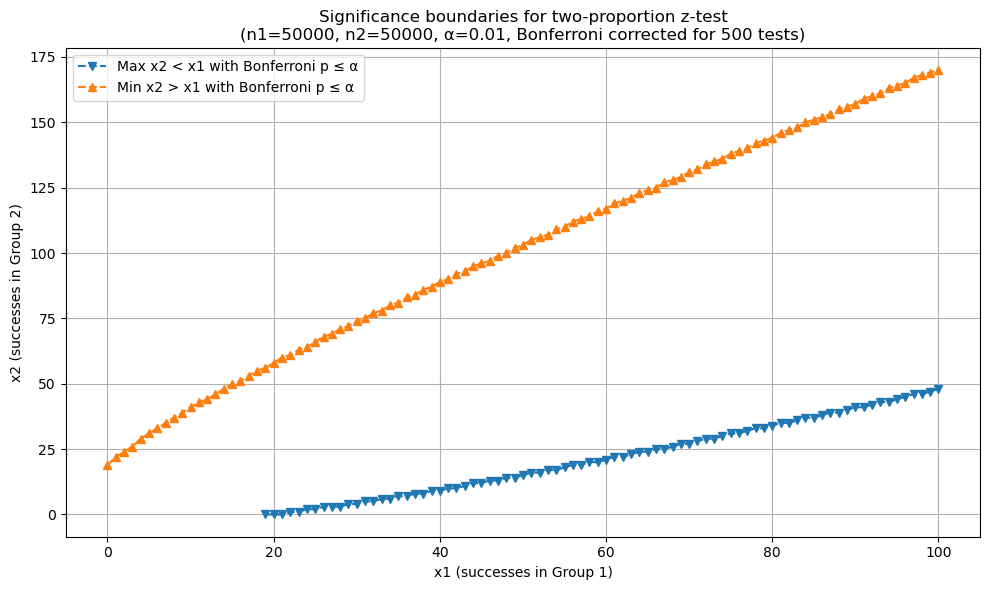

In [29]:
plot_significance_boundaries(n1=50000, n2=50000, alpha=0.01, x1_max=100, num_tests=500)